## Helper functions and import library

In [1]:
import pickle
import json
import os
from rich.console import Console
from rich.tree import Tree



def dict_to_tree(data, tree=None, parent_key=None, root_name="Root"):
    '''Print the hierarchy of dict in annotation file'''
    if tree is None:
        tree = Tree(f"[bold green]{root_name}[/bold green]")

    for key, value in data.items():
        # Special case for 'infos' key
        if isinstance(value, list) and value and isinstance(value[0], dict):
            branch = tree.add(f"[bold magenta]{key}[/bold magenta] (list of items, only show infos for items[0])")
            if isinstance(value[0], dict):
                dict_to_tree(value[0], branch, key)
            else:
                branch.add(str(value[0]))
        elif isinstance(value, dict):
            branch = tree.add(f"[bold magenta]{key}[/bold magenta]")
            dict_to_tree(value, branch, key)
        else:
            tree.add(f"[yellow]{key}[/yellow]: {value}")

    return tree



def print_dict_tree(anno_file, anno_name="Root"):
    '''Pretty-Print dictionary'''
    console = Console(record=True)
    tree = dict_to_tree(anno_file, root_name=anno_name)
    console.print(tree)


# Nuscenes Annotation Database

In [2]:
# Load annotation file
data_path = "../data/nuscenes/"
anno_file = "nuscenes_infos_train_mono3d.coco.json"
anno_path = data_path + anno_file
anno_name, anno_ext = os.path.splitext(anno_file)

save_tree_dir = "./anno_trees"
os.makedirs(save_tree_dir, exist_ok=True)
save_tree_path = os.path.join(save_tree_dir, f"{anno_name}.txt")


if anno_ext == ".pkl":
    with open(anno_path, "rb") as f: 
        anno_dict = pickle.load(f)
elif anno_ext == ".json": 
    with open(anno_path, "r") as f: 
        anno_dict = json.load(f)


# Print hierarchy dict and save to files
console = Console(record=True)
tree = dict_to_tree(anno_dict, root_name=anno_name)
console.print(tree)


# Save to a file
with open(save_tree_path, "w") as f:
    f.write(console.export_text())

nuscenes_infos_train_mono3d.coco
├── annotations (list of items, only show infos for items[0])
│   ├── file_name: samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg
│   ├── image_id: e3d495d4ac534d54b321f50006683844
│   ├── area: 691.342453755944
│   ├── category_name: pedestrian
│   ├── category_id: 7
│   ├── bbox: [1206.5693751819117, 477.86111828160216, 19.31993062031279, 35.78389940122628]
│   ├── iscrowd: 0
│   ├── bbox_cam3d: [18.63882979851619, 0.19359276352412746, 59.02486732065484, 0.669, 1.642, 0.621, 
│   │   -3.120487679005878]
│   ├── velo_cam3d: [0.0, 0.0]
│   ├── center2d: [1216.1754150390625, 495.6607666015625, 59.02486801147461]
│   ├── attribute_name: pedestrian.standing
│   ├── attribute_id: 3
│   ├── segmentation: []
│   └── id: 0
├── images (list of items, only show infos for items[0])
│   ├── file_name: samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg
│   ├── id: e3d495d4ac534d54b321f50006683844
│   ├── token: ca9a282c9e77460f8360f564131a8af5
│   ├── cam2ego_rotation: [0.4998015430569128, -0.5030316162024876, 0.4997798114386805, -0.49737083824542755]
│   ├── cam2ego_translation: [1.70079118954, 0.0159456324149, 1.51095763913]
│   ├── ego2global_rotation: [0.5720320396729045, -0.0016977771610471074, 0.011798001930183783, 
│   │   -0.8201446642457809]
│   ├── ego2global_translation: [411.3039349319818, 1180.8903791765097, 0.0]
│   ├── cam_intrinsic: [[1266.417203046554, 0.0, 816.2670197447984], [0.0, 1266.417203046554, 491.50706579294757], 
│   │   [0.0, 0.0, 1.0]]
│   ├── width: 1600
│   └── height: 900
└── categories (list of items, only show infos for items[0])
    ├── id: 0
    └── name: car

# LIDC annotations file

In [3]:
# Load annotation file
data_path = "../data/lidc/"
anno_file = "lidc_infos_train_2d_anno.coco.json"
anno_path = data_path + anno_file
anno_name, anno_ext = os.path.splitext(anno_file)

save_tree_dir = "./anno_trees"
os.makedirs(save_tree_dir, exist_ok=True)
save_tree_path = os.path.join(save_tree_dir, f"{anno_name}.txt")


if anno_ext == ".pkl":
    with open(anno_path, "rb") as f: 
        anno_dict = pickle.load(f)
elif anno_ext == ".json": 
    with open(anno_path, "r") as f: 
        anno_dict = json.load(f)


# Print hierarchy dict and save to files
console = Console(record=True)
tree = dict_to_tree(anno_dict, root_name=anno_name)
console.print(tree)


# Save to a file
with open(save_tree_path, "w") as f:
    f.write(console.export_text())

lidc_infos_train_2d_anno.coco
├── annotations (list of items, only show infos for items[0])
│   ├── file_name: Patient0000/Image_00.png
│   ├── image_id: 0000cam00
│   ├── area: 3780.0
│   ├── category_name: nodule
│   ├── category_id: 1
│   ├── bbox: [369.0, 567.0, 54.0, 70.0]
│   ├── iscrowd: 0
│   ├── bbox_cam3d: [34.453125, 59.0625, 28.828125, 48.75, 28.125, 17.5, 0.0]
│   ├── center2d: [0, 0, 0]
│   ├── id: 0
│   ├── subtlety: 5
│   ├── internalStructure: 1
│   ├── calcification: 6
│   ├── sphericity: 3
│   ├── margin: 3
│   ├── lobulation: 3
│   ├── spiculation: 4
│   ├── texture: 5
│   └── malignancy: 5
├── images (list of items, only show infos for items[0])
│   ├── file_name: Patient0000/Image_00.png
│   ├── id: 0000cam00
│   ├── cam_intrinsic
│   │   ├── data_path: ./data/lidc/Images/Patient0000/Image_00.png
│   │   ├── type: CAM_00
│   │   ├── sample_data_token: 000cam00
│   │   ├── timestamp: 1735686000000000
│   │   └── cam_intrinsic: [[600.0, 0.0, -400.390625], [0.0, 600.0, -400.390625], [0.0, 0.0, 1.0]]
│   ├── width: 1024
│   └── height: 1024
└── categories (list of items, only show infos for items[0])
    ├── id: 0
    └── name: normal

# Nuscenes DataClass

In [4]:
import sys
import os
import json

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from mmdet3d_plugin import CustomNuScenesDataset

data_root = "../data/nuscenes/"


mv2d_dataclass = CustomNuScenesDataset(
    ann_file=data_root + "nuscenes_infos_train.pkl",
    ann_file_2d=data_root + "nuscenes_infos_train_mono3d.coco.json",
)

loading annotations into memory...
Done (t=0.36s)
creating index...
index created!


In [5]:
# Check anno_2d
anno_2d_path = mv2d_dataclass.ann_file_2d
with open(anno_2d_path, "r") as f:
    anno_2d_coco = json.load(f)

console = Console(record=True)
tree = dict_to_tree(anno_2d_coco)
console.print(tree)

Root
├── annotations (list of items, only show infos for items[0])
│   ├── file_name: samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg
│   ├── image_id: e3d495d4ac534d54b321f50006683844
│   ├── area: 691.342453755944
│   ├── category_name: pedestrian
│   ├── category_id: 7
│   ├── bbox: [1206.5693751819117, 477.86111828160216, 19.31993062031279, 35.78389940122628]
│   ├── iscrowd: 0
│   ├── bbox_cam3d: [18.63882979851619, 0.19359276352412746, 59.02486732065484, 0.669, 1.642, 0.621, 
│   │   -3.120487679005878]
│   ├── velo_cam3d: [0.0, 0.0]
│   ├── center2d: [1216.1754150390625, 495.6607666015625, 59.02486801147461]
│   ├── attribute_name: pedestrian.standing
│   ├── attribute_id: 3
│   ├── segmentation: []
│   └── id: 0
├── images (list of items, only show infos for items[0])
│   ├── file_name: samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg
│   ├── id: e3d495d4ac534d54b321f50006683844
│   ├── token: ca9a282c9e77460f8360f564131a8af5
│   ├── cam2ego_rotation: [0.4998015430569128, -0.5030316162024876, 0.4997798114386805, -0.49737083824542755]
│   ├── cam2ego_translation: [1.70079118954, 0.0159456324149, 1.51095763913]
│   ├── ego2global_rotation: [0.5720320396729045, -0.0016977771610471074, 0.011798001930183783, 
│   │   -0.8201446642457809]
│   ├── ego2global_translation: [411.3039349319818, 1180.8903791765097, 0.0]
│   ├── cam_intrinsic: [[1266.417203046554, 0.0, 816.2670197447984], [0.0, 1266.417203046554, 491.50706579294757], 
│   │   [0.0, 0.0, 1.0]]
│   ├── width: 1600
│   └── height: 900
└── categories (list of items, only show infos for items[0])
    ├── id: 0
    └── name: car

## Check `get_ann_info()` method

In [6]:
print_dict_tree(mv2d_dataclass.get_ann_info(100))

Root
├── gt_bboxes_3d: LiDARInstance3DBoxes(
│       tensor([[-9.3708e+00,  8.4574e+00, -1.5339e+00,  9.1800e-01,  5.5200e-01,
│             1.7390e+00, -6.1405e-02,  1.5540e+00, -1.7942e-01],
│           [-6.2187e+00,  7.2427e+00, -1.4847e+00,  8.3400e-01,  6.7700e-01,
│             1.6580e+00, -1.1726e-01,  1.1874e+00, -5.7355e-02],
│           [ 3.9239e+01,  1.4415e+01,  3.6396e-01,  1.6220e+00,  5.2500e-01,
│             1.6960e+00, -3.0321e-02,  3.2723e+00,  3.7036e-02],
│           [-4.5089e-01,  5.0203e+01,  2.3932e-01,  7.1800e-01,  5.4700e-01,
│             1.3250e+00,  1.0110e-01, -5.6517e-03,  3.2019e-04],
│           [-2.0953e+00,  8.7623e+00, -1.3941e+00,  7.9800e-01,  6.1200e-01,
│             1.5600e+00, -1.1726e-01,  1.1533e+00, -1.2130e-01],
│           [ 1.8468e+01, -6.2957e-01, -1.2691e+00,  4.4000e-01,  2.9050e+00,
│             9.2000e-01,  2.5113e+00,  0.0000e+00,  0.0000e+00],
│           [ 1.3696e+01, -8.9548e+00, -2.1105e+00,  3.9600e-01,  3.0250e+00,
│             1.0210e+00,  2.7716e+00,  0.0000e+00,  0.0000e+00],
│           [ 1.1527e+01, -1.8892e+01, -2.9950e+00,  4.1300e-01,  3.5860e+00,
│             9.7300e-01,  3.0513e+00,  0.0000e+00,  0.0000e+00],
│           [ 8.2973e+00,  2.0051e+01, -3.7823e-01,  4.4640e+00,  2.0430e+00,
│             1.5670e+00, -3.0321e-02,  8.6382e+00, -3.3568e-01],
│           [-1.4318e+00,  8.7036e+00, -1.3874e+00,  6.8900e-01,  4.6600e-01,
│             8.4200e-01, -1.1726e-01,  1.0600e+00, -9.1930e-02],
│           [ 6.1010e+01,  2.2686e+01,  6.1646e-01,  4.5740e+00,  1.9710e+00,
│             1.4990e+00,  4.8429e-02,  4.3414e+00,  8.3957e-02],
│           [ 1.4905e+01, -5.9879e+00, -1.7686e+00,  3.9500e-01,  3.0340e+00,
│             9.4000e-01,  2.7554e+00,  0.0000e+00,  0.0000e+00],
│           [ 1.1200e+01, -3.7652e+01, -3.8061e+00,  5.3300e-01,  3.2770e+00,
│             9.5700e-01, -3.1074e+00,  0.0000e+00,  0.0000e+00],
│           [-5.0671e+00,  4.4758e+01,  2.9932e-01,  9.5840e+00,  2.7250e+00,
│             3.1720e+00,  1.5171e+00, -3.9814e-02,  6.9237e+00],
│           [-1.3800e-01, -7.9725e+00, -2.1085e+00,  4.7820e+00,  1.9790e+00,
│             1.9540e+00,  1.5534e+00,  5.8529e-04, -2.1582e-03],
│           [-2.8027e+01,  5.6104e+01,  7.4761e-01,  4.6900e-01,  5.0200e-01,
│             1.7030e+00,  1.5767e+00, -2.2174e-01,  1.5256e+00],
│           [-4.6591e+01,  3.6891e+01, -4.2081e-01,  4.5290e+00,  2.0100e+00,
│             1.7040e+00, -3.1195e+00, -6.1562e-03,  3.8906e-03],
│           [-4.2378e+00,  7.7853e+01,  1.3301e+00,  6.3900e-01,  6.7300e-01,
│             1.8210e+00, -1.4802e+00,  2.1639e-01, -1.5076e+00],
│           [-3.0792e+00, -1.6158e+01, -2.3711e+00,  1.4010e+01,  2.3300e+00,
│             3.8890e+00,  1.5959e+00,  0.0000e+00,  0.0000e+00],
│           [ 1.1288e+01, -2.6254e+01, -3.4339e+00,  5.3500e-01,  3.2770e+00,
│             9.0900e-01,  3.1410e+00,  0.0000e+00,  0.0000e+00],
│           [ 1.6611e+01, -3.0511e+00, -1.5834e+00,  4.1600e-01,  3.0620e+00,
│             9.7900e-01,  2.4764e+00,  0.0000e+00,  0.0000e+00],
│           [-3.3300e+00, -8.0225e+00, -2.2591e+00,  6.4180e+00,  2.3390e+00,
│             3.9640e+00,  1.6173e+00,  0.0000e+00,  0.0000e+00],
│           [-1.4258e+01,  2.1624e+01, -1.0209e+00,  4.7200e+00,  2.0890e+00,
│             1.4730e+00, -6.5227e-02,  1.0647e+01, -6.3863e-01],
│           [ 1.4763e+01, -5.2986e+01, -4.5726e+00,  4.5900e+00,  2.0200e+00,
│             1.6870e+00, -4.7774e-02,  3.6535e-03,  1.9181e-03],
│           [-7.0822e-01,  7.0702e+00, -1.4183e+00,  7.5600e-01,  6.9200e-01,
│             1.7520e+00, -9.9802e-02,  1.2316e+00, -6.6232e-02],
│           [ 1.1297e+01, -2.2593e+01, -3.1277e+00,  5.3300e-01,  3.2800e+00,
│             9.1000e-01,  3.0688e+00, -1.9982e-03,  2.2383e-03],
│           [ 1.1989e+01, -1.5224e+01, -2.6175e+00,  4.1300e-01,  3.1180e+00,
│             9.1600e-01,  2.9639e+00,  0.0000e+00,  0.0000e+00],
│           [ 1.1372e+01, -2.9620e+01, -3.7857e+00,  5.2200e-01

## Check `data_infos_2d` attribute

In [7]:
# Check data_info

print(mv2d_dataclass.cat2id)
print(mv2d_dataclass.cat2label)
print(mv2d_dataclass.impath_to_imgid)

mv2d_datainfos_2d = mv2d_dataclass.data_infos_2d
type(mv2d_datainfos_2d)

console = Console(record=True)
tree = dict_to_tree(mv2d_datainfos_2d[0])
console.print(tree)

{'car': 0, 'truck': 1, 'trailer': 2, 'bus': 3, 'construction_vehicle': 4, 'bicycle': 5, 'motorcycle': 6, 'pedestrian': 7, 'traffic_cone': 8, 'barrier': 9}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
{'./data/nuscenes/samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg': 'e3d495d4ac534d54b321f50006683844', './data/nuscenes/samples/CAM_FRONT_RIGHT/n015-2018-07-24-11-22-45+0800__CAM_FRONT_RIGHT__1532402927620339.jpg': 'aac7867ebf4f446395d29fbd60b63b3b', './data/nuscenes/samples/CAM_FRONT_LEFT/n015-2018-07-24-11-22-45+0800__CAM_FRONT_LEFT__1532402927604844.jpg': 'fe5422747a7d4268a4b07fc396707b23', './data/nuscenes/samples/CAM_BACK/n015-2018-07-24-11-22-45+0800__CAM_BACK__1532402927637525.jpg': '03bea5763f0f4722933508d5999c5fd8', './data/nuscenes/samples/CAM_BACK_LEFT/n015-2018-07-24-11-22-45+0800__CAM_BACK_LEFT__1532402927647423.jpg': '43893a033f9c46d4a51b5e08a67a1eb7', './data/nuscenes/samples/CAM_BACK_RIGHT/n015-2018-07-24-11-22-45+0800__CAM_

Root
├── file_name: samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg
├── id: e3d495d4ac534d54b321f50006683844
├── token: ca9a282c9e77460f8360f564131a8af5
├── cam2ego_rotation: [0.4998015430569128, -0.5030316162024876, 0.4997798114386805, -0.49737083824542755]
├── cam2ego_translation: [1.70079118954, 0.0159456324149, 1.51095763913]
├── ego2global_rotation: [0.5720320396729045, -0.0016977771610471074, 0.011798001930183783, -0.8201446642457809]
├── ego2global_translation: [411.3039349319818, 1180.8903791765097, 0.0]
├── cam_intrinsic: [[1266.417203046554, 0.0, 816.2670197447984], [0.0, 1266.417203046554, 491.50706579294757], 
│   [0.0, 0.0, 1.0]]
├── width: 1600
├── height: 900
└── filename: samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg

## Check `data_infos` attribute

In [8]:
print_dict_tree(mv2d_dataclass.data_infos[0])

Root
├── lidar_path: 
│   ./data/nuscenes/samples/LIDAR_TOP/n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402927647951.pcd.bin
├── token: ca9a282c9e77460f8360f564131a8af5
├── sweeps: []
├── cams
│   ├── CAM_FRONT
│   │   ├── data_path: 
│   │   │   ./data/nuscenes/samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg
│   │   ├── type: CAM_FRONT
│   │   ├── sample_data_token: e3d495d4ac534d54b321f50006683844
│   │   ├── sensor2ego_translation: [1.70079118954, 0.0159456324149, 1.51095763913]
│   │   ├── sensor2ego_rotation: [0.4998015430569128, -0.5030316162024876, 0.4997798114386805, 
│   │   │   -0.49737083824542755]
│   │   ├── ego2global_translation: [411.4199861830012, 1181.197175631848, 0.0]
│   │   ├── ego2global_rotation: [0.5720063498929273, -0.0021434844534272707, 0.011564094980151613, 
│   │   │   -0.8201648693182716]
│   │   ├── timestamp: 1532402927612460
│   │   ├── sensor2lidar_rotation: [[ 0.99997025  0.00685271 -0.00354221]
│   │   │    [ 0.00340737  0.01958963  0.9998023 ]
│   │   │    [ 0.00692074 -0.99978462  0.0195657 ]]
│   │   ├── sensor2lidar_translation: [-0.01613824  0.43552529 -0.32067179]
│   │   └── cam_intrinsic: [[1.26641720e+03 0.00000000e+00 8.16267020e+02]
│   │        [0.00000000e+00 1.26641720e+03 4.91507066e+02]
│   │        [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
│   ├── CAM_FRONT_RIGHT
│   │   ├── data_path: 
│   │   │   ./data/nuscenes/samples/CAM_FRONT_RIGHT/n015-2018-07-24-11-22-45+0800__CAM_FRONT_RIGHT__153240292762033
│   │   │   9.jpg
│   │   ├── type: CAM_FRONT_RIGHT
│   │   ├── sample_data_token: aac7867ebf4f446395d29fbd60b63b3b
│   │   ├── sensor2ego_translation: [1.5508477543, -0.493404796419, 1.49574800619]
│   │   ├── sensor2ego_rotation: [0.2060347966337182, -0.2026940577919598, 0.6824507824531167, -0.6713610884174485]
│   │   ├── ego2global_translation: [411.3940085709597, 1181.1288333610287, 0.0]
│   │   ├── ego2global_rotation: [0.5719976683022334, -0.0020681756810697035, 0.011639346518095882, 
│   │   │   -0.820170052927313]
│   │   ├── timestamp: 1532402927620339
│   │   ├── sensor2lidar_rotation: [[ 0.5515799  -0.01031499  0.83405828]
│   │   │    [-0.83369859  0.02504088  0.55165171]
│   │   │    [-0.02657584 -0.99963321  0.00521245]]
│   │   ├── sensor2lidar_translation: [ 0.49387353  0.35824041 -0.33437488]
│   │   └── cam_intrinsic: [[1.26084744e+03 0.00000000e+00 8.07968245e+02]
│   │        [0.00000000e+00 1.26084744e+03 4.95334427e+02]
│   │        [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
│   ├── CAM_FRONT_LEFT
│   │   ├── data_path: 
│   │   │   ./data/nuscenes/samples/CAM_FRONT_LEFT/n015-2018-07-24-11-22-45+0800__CAM_FRONT_LEFT__1532402927604844.
│   │   │   jpg
│   │   ├── type: CAM_FRONT_LEFT
│   │   ├── sample_data_token: fe5422747a7d4268a4b07fc396707b23
│   │   ├── sensor2ego_translation: [1.52387798135, 0.494631336551, 1.50932822144]
│   │   ├── sensor2ego_rotation: [0.6757265034669446, -0.6736266522251881, 0.21214015046209478, 
│   │   │   -0.21122827103904068]
│   │   ├── ego2global_translation: [411.4449780367985, 1181.2631893914647, 0.0]
│   │   ├── ego2global_rotation: [0.5720093912295269, -0.002216202910524616, 0.011491368029605502, 
│   │   │   -0.8201635771300098]
│   │   ├── timestamp: 1532402927604844
│   │   ├── sensor2lidar_rotation: [[ 0.5729949   0.00277172 -0.81955425]
│   │   │    [ 0.81925943  0.02509515  0.57287365]
│   │   │    [ 0.02215468 -0.99968122  0.01210864]]
│   │   ├── sensor2lidar_translation: [-0.4959262   0.18893437 -0.33176293]
│   │   └── cam_intrinsic: [[1.27259795e+03 0.00000000e+00 8.26615493e+02]
│   │        [0.00000000e+00 1.27259795e+03 4.79751654e+02]
│   │        [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
│   ├── CAM_BACK
│   │   ├── data_path: 
│   │   │   ./data/nuscenes/samples/CAM_BACK/n015-2018-07-24-11-22-45+0800__CAM_BACK__1532402927637525.jpg
│   │   ├── type: CAM_BACK
│   │   ├── sample_data_token: 03bea5763f0f4722933508d5999c5fd8
│   │   ├── sensor2ego_translat

In [9]:
intrinsic_mv2d = mv2d_dataclass.get_data_info(0)['intrinsics']

# equal number of cam
print(len(intrinsic_mv2d))

# shape (4, 4) compared to cam_intrinsic (3, 3)
intrinsic_mv2d[0].shape
intrinsic_mv2d[1]


6


array([[1.26084744e+03, 0.00000000e+00, 8.07968245e+02, 0.00000000e+00],
       [0.00000000e+00, 1.26084744e+03, 4.95334427e+02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [10]:
mv2d_dataclass.data_infos[0]['cams']['CAM_FRONT_RIGHT']['cam_intrinsic']

array([[1.26084744e+03, 0.00000000e+00, 8.07968245e+02],
       [0.00000000e+00, 1.26084744e+03, 4.95334427e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [13]:
# Check the extrinsic data 
# from the get_data_info method

get_data_0 = mv2d_dataclass.get_data_info(0)

get_data_0['ann_info']['gt_bboxes_2d_to_3d']


[array([ 0,  1,  2,  5,  6,  8,  9, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25,
        29, -1, 30, 31, 32, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, -1, 45,
        46, 48, -1, 49, 51, 53, 55, 58, 61, 62, 63, 64, 65]),
 array([ 1,  2,  3,  6, 13, 23, 24, 25, 30, 31, 32, 39, 40, 44, 45, 48, 60,
        65]),
 array([12, 18]),
 array([ 4,  7, 10, 11, 26, 33, 47, 50, 57, 59]),
 array([14, 27]),
 array([28, 38, 52, 54, 57])]

In [13]:
get_data_0['ann_info']['gt_bboxes_2d'][0].shape

(47, 4)

In [14]:
get_data_0['ann_info']['gt_bboxes_3d'][0]

LiDARInstance3DBoxes(
    tensor([[ 1.8414e+01,  5.9516e+01, -5.1365e-02,  6.6900e-01,  6.2100e-01,
          1.6420e+00,  3.1241e+00,  0.0000e+00,  0.0000e+00]]))

# LIDC DataClass


In [15]:
import sys
import os
import importlib
import mmdet3d_plugin

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Reload the module to get the latest changes
importlib.reload(mmdet3d_plugin)

from mmdet3d_plugin import CustomLIDCDataset


data_root_lidc = "../data/lidc/"

lidc_dataclass = CustomLIDCDataset(
    data_root=data_root_lidc,
    ann_file=data_root_lidc + "lidc_infos_train.pkl",
    ann_file_2d=data_root_lidc + "lidc_infos_train_2d_anno.coco.json",
)

lidc_data_info = lidc_dataclass.data_infos
type(lidc_data_info)

loading annotations into memory...
Done (t=0.98s)
creating index...
index created!


list

## Chek `get_ann_info()` method

In [16]:
print_dict_tree(lidc_dataclass.get_ann_info(0))

Root
├── gt_bboxes_3d: CameraInstance3DBoxes(
│       tensor([[34.4531, 73.1250, 28.8281, 48.7500, 28.1250, 17.5000,  0.0000],
│           [30.2344, 75.9375, 29.5312, 51.2500, 29.5312, 15.0000,  0.0000],
│           [31.6406, 74.5312, 29.5312, 48.7500, 26.7188, 17.5000,  0.0000],
│           [35.8594, 72.4219, 29.5312, 48.7500, 26.7188, 20.0000,  0.0000]]))
├── gt_labels_3d: [1 1 1 1]
└── gt_names: ['nodule' 'nodule' 'nodule' 'nodule']

## Check `data_infos_2d` attributes

In [17]:
# Check load_annotations_2d

print(lidc_dataclass.cat2id)
print(lidc_dataclass.cat2label)
print(lidc_dataclass.cat_ids)

print_dict_tree(lidc_dataclass.data_infos_2d[0])

{'normal': 0, 'nodule': 1}
{0: 0, 1: 1}
[0, 1]


Root
├── file_name: Patient0000/Image_00.png
├── id: 0000cam00
├── cam_intrinsic
│   ├── data_path: ./data/lidc/Images/Patient0000/Image_00.png
│   ├── type: CAM_00
│   ├── sample_data_token: 000cam00
│   ├── timestamp: 1735686000000000
│   └── cam_intrinsic: [[600.0, 0.0, -400.390625], [0.0, 600.0, -400.390625], [0.0, 0.0, 1.0]]
├── width: 1024
├── height: 1024
└── filename: Patient0000/Image_00.png

## Check `data_infos` attribute

In [18]:
print_dict_tree(lidc_dataclass.data_infos[0])

Root
├── token: 0
├── sample_id: 0
├── lidc_id_ref: LIDC-IDRI-0001
├── cams
│   ├── CAM_00
│   │   ├── data_path: ./data/lidc/Images/Patient0000/Image_00.png
│   │   ├── type: CAM_00
│   │   ├── sample_data_token: 000cam00
│   │   ├── timestamp: 1735686000000000
│   │   └── cam_intrinsic: [[ 600.          0.       -400.390625]
│   │        [   0.        600.       -400.390625]
│   │        [   0.          0.          1.      ]]
│   ├── CAM_01
│   │   ├── data_path: ./data/lidc/Images/Patient0000/Image_01.png
│   │   ├── type: CAM_01
│   │   ├── sample_data_token: 000cam01
│   │   ├── timestamp: 1735686000000000
│   │   └── cam_intrinsic: [[ 600.          0.       -400.390625]
│   │        [   0.        600.       -400.390625]
│   │        [   0.          0.          1.      ]]
│   ├── CAM_02
│   │   ├── data_path: ./data/lidc/Images/Patient0000/Image_02.png
│   │   ├── type: CAM_02
│   │   ├── sample_data_token: 000cam02
│   │   ├── timestamp: 1735686000000000
│   │   └── cam_intrinsic: [[ 600.          0.       -400.390625]
│   │        [   0.        600.       -400.390625]
│   │        [   0.          0.          1.      ]]
│   ├── CAM_03
│   │   ├── data_path: ./data/lidc/Images/Patient0000/Image_03.png
│   │   ├── type: CAM_03
│   │   ├── sample_data_token: 000cam03
│   │   ├── timestamp: 1735686000000000
│   │   └── cam_intrinsic: [[ 600.          0.       -400.390625]
│   │        [   0.        600.       -400.390625]
│   │        [   0.          0.          1.      ]]
│   ├── CAM_04
│   │   ├── data_path: ./data/lidc/Images/Patient0000/Image_04.png
│   │   ├── type: CAM_04
│   │   ├── sample_data_token: 000cam04
│   │   ├── timestamp: 1735686000000000
│   │   └── cam_intrinsic: [[ 600.          0.       -400.390625]
│   │        [   0.        600.       -400.390625]
│   │        [   0.          0.          1.      ]]
│   ├── CAM_05
│   │   ├── data_path: ./data/lidc/Images/Patient0000/Image_05.png
│   │   ├── type: CAM_05
│   │   ├── sample_data_token: 000cam05
│   │   ├── timestamp: 1735686000000000
│   │   └── cam_intrinsic: [[ 600.          0.       -400.390625]
│   │        [   0.        600.       -400.390625]
│   │        [   0.          0.          1.      ]]
│   ├── CAM_06
│   │   ├── data_path: ./data/lidc/Images/Patient0000/Image_06.png
│   │   ├── type: CAM_06
│   │   ├── sample_data_token: 000cam06
│   │   ├── timestamp: 1735686000000000
│   │   └── cam_intrinsic: [[ 600.          0.       -400.390625]
│   │        [   0.        600.       -400.390625]
│   │        [   0.          0.          1.      ]]
│   ├── CAM_07
│   │   ├── data_path: ./data/lidc/Images/Patient0000/Image_07.png
│   │   ├── type: CAM_07
│   │   ├── sample_data_token: 000cam07
│   │   ├── timestamp: 1735686000000000
│   │   └── cam_intrinsic: [[ 600.          0.       -400.390625]
│   │        [   0.        600.       -400.390625]
│   │        [   0.          0.          1.      ]]
│   ├── CAM_08
│   │   ├── data_path: ./data/lidc/Images/Patient0000/Image_08.png
│   │   ├── type: CAM_08
│   │   ├── sample_data_token: 000cam08
│   │   ├── timestamp: 1735686000000000
│   │   └── cam_intrinsic: [[ 600.          0.       -400.390625]
│   │        [   0.        600.       -400.390625]
│   │        [   0.          0.          1.      ]]
│   └── CAM_09
│       ├── data_path: ./data/lidc/Images/Patient0000/Image_09.png
│       ├── type: CAM_09
│       ├── sample_data_token: 000cam09
│       ├── timestamp: 1735686000000000
│       └── cam_intrinsic: [[ 600.          0.       -400.390625]
│            [   0.        600.       -400.390625]
│            [   0.          0.          1.      ]]
├── gt_boxes: [[34.453125 59.0625   28.828125 48.75     28.125    17.5       0.      ]
│    [30.234375 61.171875 29.53125  51.25     29.53125  15.        0.      ]
│    [31.640625 61.171875 29.53125  48.75     26.71875  17.5       0.      ]
│    [35.859375 59.0625   29.53125  48.75     26.71875  20.        0.      ]]
├── gt_names: ['nodule' 'nodule' 'nodule' 'no

## Check get_data_info(index) method

In [19]:
lidc_dataclass.impath_to_imgid

{'./data/lidc/Images/Patient0000/Image_00.png': '0000cam00',
 './data/lidc/Images/Patient0000/Image_01.png': '0000cam01',
 './data/lidc/Images/Patient0000/Image_02.png': '0000cam02',
 './data/lidc/Images/Patient0000/Image_03.png': '0000cam03',
 './data/lidc/Images/Patient0000/Image_04.png': '0000cam04',
 './data/lidc/Images/Patient0000/Image_05.png': '0000cam05',
 './data/lidc/Images/Patient0000/Image_06.png': '0000cam06',
 './data/lidc/Images/Patient0000/Image_07.png': '0000cam07',
 './data/lidc/Images/Patient0000/Image_08.png': '0000cam08',
 './data/lidc/Images/Patient0000/Image_09.png': '0000cam09',
 './data/lidc/Images/Patient0001/Image_00.png': '0001cam00',
 './data/lidc/Images/Patient0001/Image_01.png': '0001cam01',
 './data/lidc/Images/Patient0001/Image_02.png': '0001cam02',
 './data/lidc/Images/Patient0001/Image_03.png': '0001cam03',
 './data/lidc/Images/Patient0001/Image_04.png': '0001cam04',
 './data/lidc/Images/Patient0001/Image_05.png': '0001cam05',
 './data/lidc/Images/Pat

In [19]:

t_info = lidc_dataclass.data_infos[0]

img_path = []

for cam_type, cam_info in t_info['cams'].items():
    img_path.append(cam_info['data_path'])
    break

print(img_path)

ann_2d = lidc_dataclass.impath_to_ann2d(img_path[0])
print(ann_2d)


['./data/lidc/Images/Patient0000/Image_00.png']
{'bboxes_cam': array([[34.453125, 59.0625  , 28.828125, 48.75    , 28.125   , 17.5     ,
         0.      ],
       [30.234375, 61.171875, 29.53125 , 51.25    , 29.53125 , 15.      ,
         0.      ],
       [31.640625, 61.171875, 29.53125 , 48.75    , 26.71875 , 17.5     ,
         0.      ],
       [35.859375, 59.0625  , 29.53125 , 48.75    , 26.71875 , 20.      ,
         0.      ]], dtype=float32), 'bboxes_2d': array([[369., 567., 423., 637.],
       [371., 569., 417., 641.],
       [371., 569., 423., 635.],
       [363., 569., 423., 635.]], dtype=float32), 'gt_bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels': array([1, 1, 1, 1])}


In [24]:
len(lidc_dataclass)

632

In [39]:
find_idx = 478

for i in range(len(lidc_dataclass)):
    _data = lidc_dataclass.get_data_info(i)
    if _data['sample_idx'] == find_idx:
        break
    else: continue

_data['ann_info']['gt_bboxes_2d_to_3d'][0]

array([0])

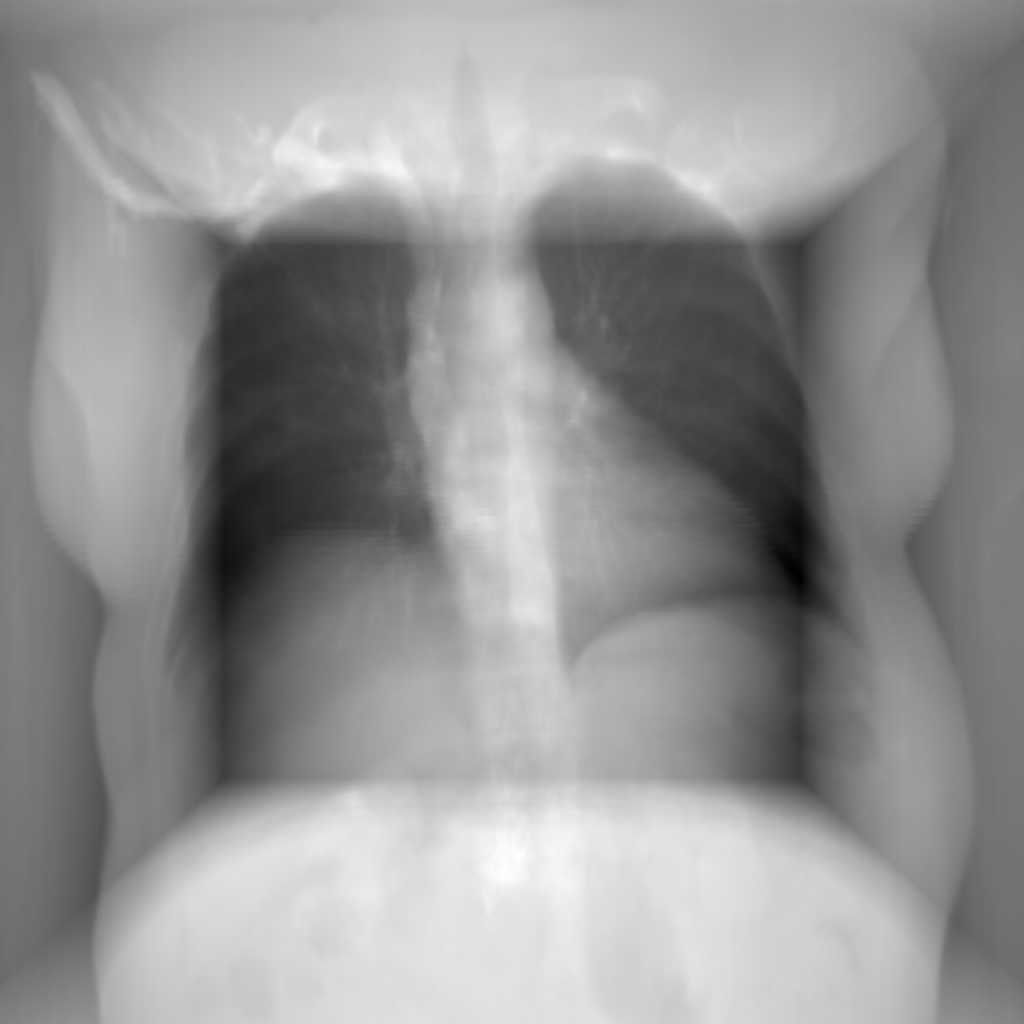

In [13]:
import torch
from torchvision import transforms
from PIL import Image


# Query 1 image from lidc_data_info

cam00 = lidc_data_info[0]['cams']['CAM_00']

# Load the image

image_path = cam00['data_path']
image = Image.open(image_path)
image


In [26]:

# Convert the image to a torch tensor
image_tensor = transforms.ToTensor()(image)


# Tensor shape
print(f"Image tensor shape: {image_tensor.shape}")
check = (image_tensor[0] == image_tensor[2])
torch.where(check == False)

Image tensor shape: torch.Size([3, 1024, 1024])


(tensor([], dtype=torch.int64), tensor([], dtype=torch.int64))

Remark: Our image has 3 duplicated channel values. 